**Expand the '...' cell below and run it.  It includes a function which is used to create the skc_df necessary throughout this notebook.**

(I've collapsed it simply because it's ugly)

In [2]:
def create_skc_df():
    # import relevant packages
    import psycopg2
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # Establish DB:
    DBNAME = "opportunity_youth"

    # Create a connection to db
    conn = psycopg2.connect(dbname=DBNAME)
    
    # define initial skc_df with appropriate age range
    def skc_df():
    
        skc_puma_codes = ['11613', '11614', '11615', '11612']
    
        QUERY = """
        SELECT rt AS record_type, serialno AS id, agep AS age, sex, st, pwgtp AS person_weight, puma, sch AS school_enrollment, schl AS education_attained, 
                esr AS employment_status, nwab AS absent_from_work, nwav AS avail_for_work, nwla AS layoff, nwlk AS look_for_work
        FROM pums_2017
        WHERE agep BETWEEN 16 AND 24"""

        relevant_ages_pums = pd.read_sql(QUERY, conn)
        skc_df = relevant_ages_pums[relevant_ages_pums['puma'].isin(skc_puma_codes)]    

        return skc_df
    
    # Call the above function and assign it to a variable
    skc_df = skc_df()
    
    # Add 2 new columns to skc_df:  
    skc_df['age_group'] = 'assign vals'
    skc_df['is_oy'] = 'assign bool'
    
    # Create oy employment/school variables:
    oy_employment_status = ['3', '6']
    oy_school_enrollment = ['1']
    
    # Assign values to 'is_oy'
    skc_df['is_oy'] = (skc_df['employment_status'].isin(oy_employment_status)) & (skc_df['school_enrollment'].isin(oy_school_enrollment))
    
    # Create function to categorise age into groups:
    def get_age_group(age):
        if age in range(16, 19):
            return 'Ages 16-18'
        elif age in range(19, 22):
            return 'Ages 19-21'
        else:
            return 'Ages 22-24'
        
    # Assign values to age_group using function above:
    skc_df['age_group'] = skc_df['age'].map(get_age_group)
    
    return skc_df

## Table values:

In this notebook, I create variables for the values that are necessary to fill in the table for part 3 of the project.  These will also be used for part 4. 

### Values to create:
- [x] Total Pop count and percentage for each age group
- [x] OY Pop count and percentage for each age group 
- [x] Working without diploma count and percentage for each age group 
- [x] Not an OY count and percentage for each age group 
- [x] OY, No diploma count and percentage for each age group 
- [x] OY, Disploma or GED count and percentage for each age group 
- [x] OY, Some college, no degree count and percentage for each age group 
- [x] OY, degree count and percentage for each age group 

In [3]:
skc_df = create_skc_df()

In [4]:
skc_df

,record_type,id,age,sex,st,person_weight,puma,school_enrollment,education_attained,employment_status,absent_from_work,avail_for_work,layoff,look_for_work,age_group,is_oy
32,P,2013000007063,19.0,1,53,30.0,11612,2,18,6,2,5,2,2,Ages 19-21,False
36,P,2013000008046,17.0,2,53,36.0,11613,2,13,6,2,5,2,2,Ages 16-18,False
48,P,2013000011255,17.0,2,53,13.0,11614,2,12,6,2,5,2,2,Ages 16-18,False
54,P,2013000012970,21.0,2,53,29.0,11612,3,18,6,2,5,2,2,Ages 19-21,False
57,P,2013000013525,18.0,2,53,24.0,11613,2,15,6,2,5,2,2,Ages 16-18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37134,P,2017001386502,18.0,1,53,17.0,11613,1,11,6,3,5,3,3,Ages 16-18,True
37684,P,2017001464049,21.0,2,53,18.0,11613,1,16,6,3,5,3,3,Ages 19-21,True
37718,P,2017001470135,23.0,1,53,17.0,11613,1,14,6,3,5,3,3,Ages 22-24,True
38050,P,2017001518359,18.0,1,53,20.0,11613,1,11,6,3,5,3,3,Ages 16-18,True


## Values for Top Half of Table "Total Population":

### Total Population Row:

Make a dataframe to display the population counts:

In [5]:
tot_pops_df = skc_df.groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
tot_pops_df.rename(columns = {'person_weight': 'population'}, inplace = True)
tot_pops_df

,population
age_group,
Ages 16-18,20635.0
Ages 19-21,17702.0
Ages 22-24,19579.0


Create a variable containing the total population of 16-24yos in SKC:

In [6]:
tot_pop = tot_pops_df.sum()
tot_pop

population    57916.0
dtype: float64

### Opportunity Youth Row:
Make a dataframe to display the opportunity youth population counts and percentages:

In [7]:
oy_pop_df = skc_df[skc_df['is_oy']].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
oy_pop_df.rename(columns = {'person_weight': 'population'}, inplace = True)
oy_pop_df['percentage'] = round(oy_pop_df['population'] / tot_pops_df['population'] * 100)
oy_pop_df

,population,percentage
age_group,,
Ages 16-18,1230.0,6.0
Ages 19-21,2541.0,14.0
Ages 22-24,2952.0,15.0


In [8]:
oy_tot_pop = oy_pop_df['population'].sum()
oy_tot_pop

6723.0

### Working without diploma row:

Make a dataframe to display the opportunity youth population countrs and percentages:

In [9]:
work_no_dip = skc_df[(skc_df['employment_status'].isin(['1', '2', '4', '5'])) & (skc_df['education_attained'] == '15')].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
work_no_dip.rename(columns = {'person_weight': 'population'}, inplace = True)
work_no_dip['percentage'] = round(work_no_dip['population'] / tot_pops_df['population'] * 100)
work_no_dip

,population,percentage
age_group,,
Ages 16-18,194.0,1.0
Ages 19-21,278.0,2.0
Ages 22-24,373.0,2.0


In [10]:
work_no_dip_tot = work_no_dip['population'].sum()
work_no_dip_tot

845.0

### Not OY row:

Make a dataframe to display the non-opportunity youth population countrs and percentages:

In [11]:
noy_pop_df = skc_df[skc_df['is_oy'] == False].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
noy_pop_df.rename(columns = {'person_weight': 'population'}, inplace = True)
noy_pop_df['percentage'] = round(noy_pop_df['population'] / tot_pops_df['population'] * 100)
noy_pop_df

,population,percentage
age_group,,
Ages 16-18,19405.0,94.0
Ages 19-21,15161.0,86.0
Ages 22-24,16627.0,85.0


In [12]:
noy_tot_pop = noy_pop_df['population'].sum()
noy_tot_pop

51193.0

## Values for Bottom Half of Table "Opportunity Youth":

### Opportunity Youth Row:
Make a dataframe to display the opportunity youth population counts and percentages:

In [13]:
oy_pop_df

,population,percentage
age_group,,
Ages 16-18,1230.0,6.0
Ages 19-21,2541.0,14.0
Ages 22-24,2952.0,15.0


In [14]:
oy_tot_pop

6723.0

### No Diploma Row:
Make a dataframe to display the opportunity youth population **with no diploma** counts and percentages:

In [29]:
# no diploma education categories:
no_dips = list(map(str, range(1, 16)))

no_dip_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(no_dips))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
no_dip_df.rename(columns = {'person_weight': 'population'}, inplace = True)
no_dip_df['percentage'] = round(no_dip_df['population'] / oy_pop_df['population'] * 100)
no_dip_df

,population,percentage
age_group,,
Ages 16-18,690.0,56.0
Ages 19-21,714.0,28.0
Ages 22-24,481.0,16.0


In [85]:
no_dip_tot_pop = no_dip_df['population'].sum()
no_dip_tot_pop

524.0

### HS Diploma or GED Row:
Make a dataframe to display the opportunity youth population **with diploma OR GED** counts and percentages:

In [35]:
#  Here I have included categoies '18' and '19', making the assumption that people who have completed some college must have a diploma or GED
# As it stands, I'm keeping 18/19 out as it skews the numbers... 
# When I include 18, 19, ages 16-18 add to 100% but the rest go over 100%
#  When i don't include, the total percentages are 98%, 98% and 95% respectively for each age group... 
#  Need to make a decision as what to use
dip_ged = list(map(str, range(16, 18)))

ged_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(dip_ged))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
ged_df.rename(columns = {'person_weight': 'population'}, inplace = True)
ged_df['percentage'] = round(ged_df['population'] / oy_pop_df['population'] * 100)
ged_df

,population,percentage
age_group,,
Ages 16-18,495.0,40.0
Ages 19-21,1405.0,55.0
Ages 22-24,1423.0,48.0


In [87]:
ged_tot_pop = ged_df['population'].sum()
ged_tot_pop

3323.0

### Some College, No Degree Row:
Make a dataframe to display the opportunity youth population **with some college but no degree** counts and percentages:

In [88]:
c_nodeg_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(['18', '19']))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
c_nodeg_df.rename(columns = {'person_weight': 'population'}, inplace = True)
c_nodeg_df['percentage'] = round(c_nodeg_df['population'] / oy_pop_df['population'] * 100)
c_nodeg_df

,population,percentage
age_group,,
Ages 16-18,19.0,2.0
Ages 19-21,295.0,12.0
Ages 22-24,675.0,23.0


In [89]:
c_nodeg_tot_pop = c_nodeg_df['population'].sum()
c_nodeg_tot_pop

989.0

### Degree (Associates or higher) Row:
Make a dataframe to display the opportunity youth population **with an associates degree or higher** counts and percentages:

In [30]:
# degree education categories:
degree = list(map(str, range(20, 25)))

degree_df = skc_df[(skc_df['is_oy']) & (skc_df['education_attained'].isin(degree))].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
degree_df.rename(columns = {'person_weight': 'population'}, inplace = True)
degree_df['percentage'] = round(degree_df['population'] / oy_pop_df['population'] * 100)
degree_df

,population,percentage
age_group,,
Ages 19-21,69.0,3.0
Ages 22-24,223.0,8.0


In [91]:
degree_tot_pop = degree_df['population'].sum()
degree_tot_pop

292.0

## Conclusion

These figures are ready to be entered into the table however a check should be done to verify these numbers.  One check will be to ensure all percentages add to 100% and all age group populations sum to the totals appropriately.  

I have a feeling some of these don't add to 100% so investigation will be necessary. 

**Cells below was my pre-work while I was scratching this out.  Keeping it to keep track of what I've tried.  Can ignore!**

Total Population of Ages 16-18 in SKC:

In [27]:
tot_pop_1618 = skc_df[skc_df['age_group'] == 'Ages 16-18']['person_weight'].sum()
tot_pop_1618

20635.0

Total Population of Ages 19-21 in SKC:

In [6]:
tot_pop_1921 = skc_df[skc_df['age_group'] == 'Ages 19-21']['person_weight'].sum()

Total Population of Ages 22-24 in SKC:

In [7]:
tot_pop_2224 = skc_df[skc_df['age_group'] == 'Ages 22-24']['person_weight'].sum()

Total Population of Ages 16-24 in SKC:

In [8]:
tot_pop_1624 = sum([tot_pop_1618, tot_pop_1921, tot_pop_2224])

### Opportunity Youth Row:

In [9]:
def create_value_oy(age_group):
    """
    Function returns value (float) needed for statistics table. 
    age_group (str)
    
    """
    return skc_df[(skc_df['age_group'] == age_group) & (skc_df['is_oy'])]['person_weight'].sum()

In [10]:
def create_percentage(sub_pop, tot_pop):
    """
    Function returns rounded percentage (float) needed for statistics table.
    sub_pop (float) population you're finding the percentage of
    tot_pop (float) total population to be in denominator
    """
    return round(sub_pop / tot_pop * 100)

Opportunity Youth Population of Ages 16-18 in SKC:

In [11]:
oy_pop_1618 = create_value_oy('Ages 16-18')

Opportunity Youth Percentage of Ages 16-18 in SKC:

In [12]:
oy_pcent_1618 = create_percentage(oy_pop_1618, tot_pop_1618)

Opportunity Youth Population of Ages 19-21 in SKC:

In [13]:
oy_pop_1921 = create_value_oy('Ages 19-21')

Opportunity Youth Percentage of Ages 19-21 in SKC:

In [14]:
oy_pcent_1921 = create_percentage(oy_pop_1921, tot_pop_1921)

Opportunity Youth Population of Ages 22-24 in SKC:

In [15]:
oy_pop_2224 = create_value_oy('Ages 22-24')

Opportunity Youth Percentage of Ages 22-24 in SKC:

In [16]:
oy_pcent_2224 = create_percentage(oy_pop_2224, tot_pop_2224)

Total Opportunity Youth Population of Ages 16-24 in SKC:

In [17]:
oy_tot_pop_1624 = sum([oy_pop_1618, oy_pop_1921, oy_pop_2224])

### Working without diploma row:

In [18]:
work_wo_dip = skc_df[(skc_df['employment_status'].isin(['1', '2', '4', '5'])) & (skc_df['education_attained'] == '15')].groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])

In [19]:
work_wo_dip

,person_weight
age_group,
Ages 16-18,194.0
Ages 19-21,278.0
Ages 22-24,373.0


In [20]:
work_wo_dip.rename(columns = {'person_weight': 'count'}, inplace = True)

In [23]:
work_wo_dip['percentage'] = round(work_wo_dip['count'] / tot_pop_1618 * 100)
work_wo_dip

In [24]:
work_wo_dip

,count,percentage
age_group,,
Ages 16-18,194.0,1.0
Ages 19-21,278.0,1.0
Ages 22-24,373.0,2.0


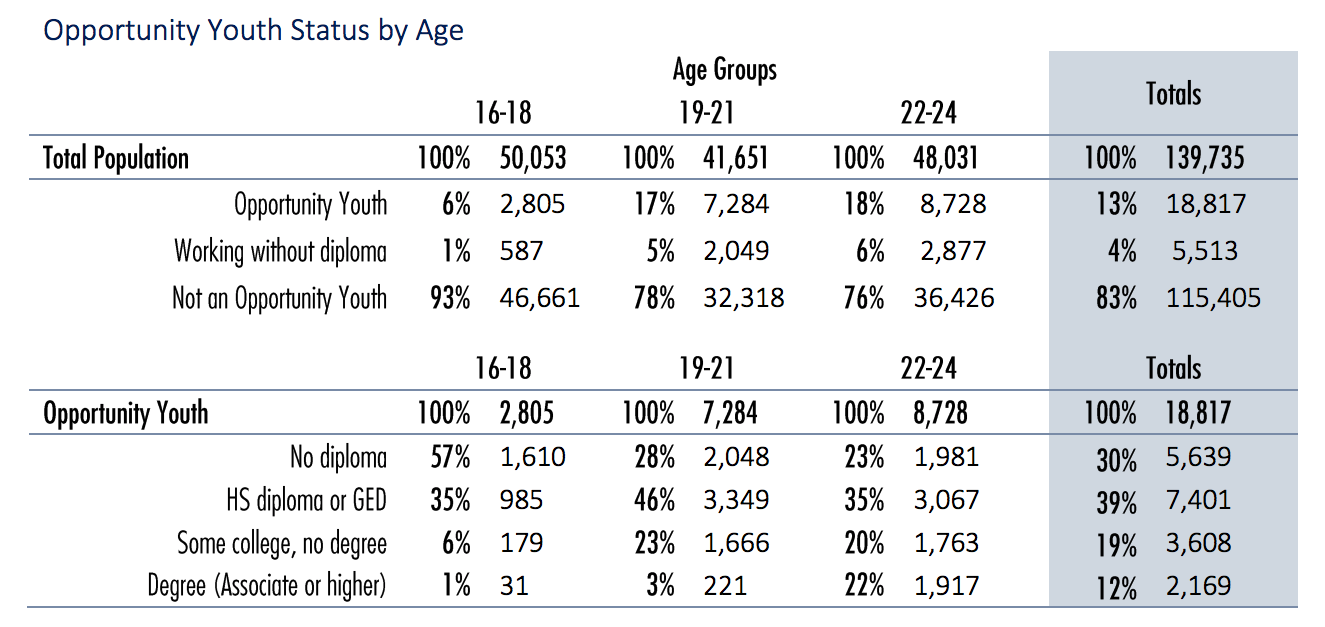